In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [36]:

def graph(x, y, color='r', fit_line=True, connect=False):
    plt.figure(figsize=(12,7))
    if connect:
        plt.plot(x, y, color + '-o')
    else:
        plt.plot(x, y, color + 'o')

    A = np.vstack([x, np.ones(len(x))]).T
    line, resid = np.linalg.lstsq(A, y, rcond=None)[:2] # fit line
    k, n = line[0], line[1]
    yfit = [k * xi + n for xi in x]
    print(resid)
    if fit_line: plt.plot(x, yfit)
    return (line[0], line[1], resid / (len(y) * np.var(y)))


[1.13912218e-13]
vijolcna 4.85909092349116e-07 [0.19434716]
[1.7836579e-13]
zelena 5.016440756316221e-07 [0.15956189]
[2.48720971e-13]
oranzna1 5.171233792393491e-07 [0.14567603]
[2.93067828e-13]
oranzna2 5.268995209017543e-07 [0.1282968]


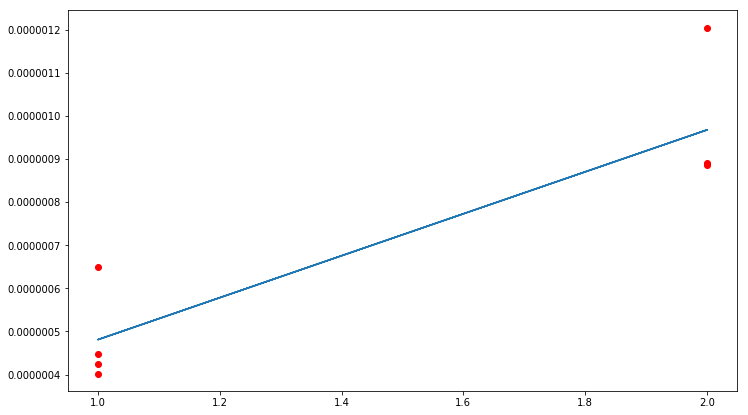

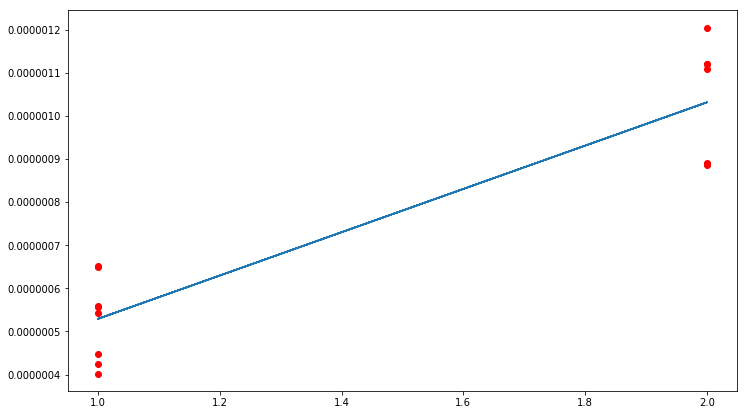

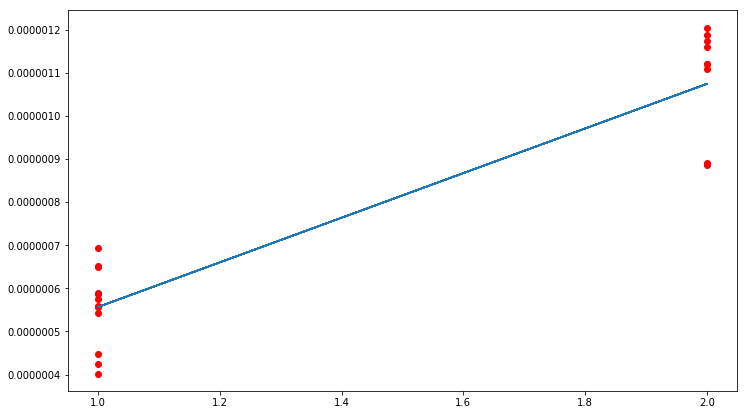

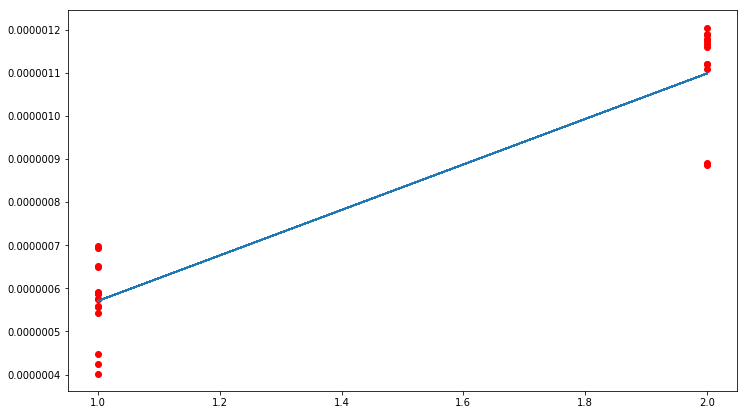

In [37]:
meritve = {
    0: {
        'vijolcna': {
            1: [162.3, 191.3],
            2: [146, 209.1]
        },
        'zelena': {
            1: [158.4, 196.7],
            2: [136.9, 218.8]
        },
        'oranzna1': {
            1: [157.3, 197.8],
            2: [133.9, 221.9]
        },
        'oranzna2': {
            1: [157.2, 197.9],
            2: [133.7, 222.0]
        },
        'a0': 177.6
    },
    20: {
        'vijolcna': {
            1: [182.9, 219.9],
            2: [167.3, 239.1]
        },
        'zelena': {
            1: [178.9, 220],
            2: [159.1]
        },
        'oranzna1': {
            1: [177.8, 221.4],
            2: [157.7]
        },
        'oranzna2': {
            1: [177.8, 221.5],
            2: [157.5]
        },
        'a0': 197.6
    }
}
d = 1.7e-6


for k1 in meritve.keys():
    for k2 in meritve[k1].keys():
        if k2 != 'a0':
            for k3 in meritve[k1][k2].keys():
                meritve[k1][k2][k3] = [i-meritve[k1]['a0'] for i in meritve[k1][k2][k3]]
                

x, y = [], []

barve = list(meritve[0].keys())
barve.remove('a0')

for k2 in barve:
    for k1 in meritve.keys():
        for k3 in meritve[k1][k2].keys():
            for phi in meritve[k1][k2][k3]:
                x.append(k3)
                phi = math.radians(abs(phi))
                y.append(d*(np.sin(math.radians(k1)) + np.sin(phi - math.radians(k1))))
                    
    k, n, e = graph(x, y)
    print(k2, k, e)